In [1]:
import os
os.chdir('/Users/Olivier/anaconda3/envs/guitarsounds')
%load_ext autoreload

In [2]:
%autoreload 2
from guitarsounds.analysis import SoundPack, Sound, Signal
from timbral_models import timbral_extractor
import numpy as np
import matplotlib.pyplot as plt

In [5]:
test = Sound('soundfiles/Wood_Guitar/Wood_A0_2.wav').condition(return_self=True)

In [19]:
test.signal.save_wav('temp')
file = 'temp.wav'
timbre = timbral_extractor(file, verbose=False)

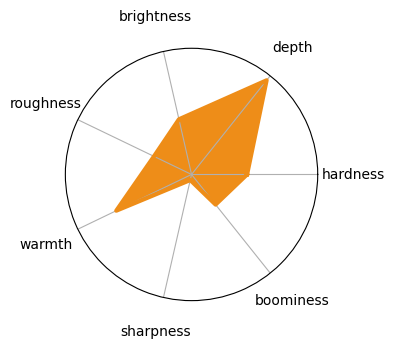

In [50]:
timbre = {key:timbre[key] for key in timbre if key not in ['rough', 'reverb', 'hardness']}

values = list(timbre.values())
categories = list(timbre.keys())
N = len(values)
values += values[:1]
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# make a square figure
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, polar=True)
ax.set_yticks([])
ax.set_yticklabels([])

r = np.arange(0, 3.0, 0.01)
theta = 2*np.pi*r
ax.plot(angles, values, color='#ee8d18', lw=3)
ax.fill(angles, values, color='#ee8d18')

# set ticklabels location at 1.3 times the axes' radius
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.xaxis.set_tick_params(pad=15)

plt.tight_layout()

plt.show()

In [83]:
test1 = Sound('soundfiles/Wood_Guitar/Wood_D0_2.wav').condition(return_self=True)
test2 = Sound('soundfiles/flax_carbon/Carbon_D0_2.wav').condition(return_self=True)
test3 = Sound('soundfiles/Wood_Guitar/Wood_E1_1.wav').condition(return_self=True)


polar
polar
polar


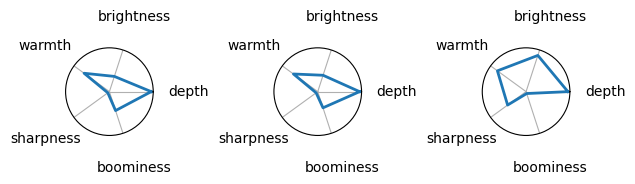

In [116]:
fig, axs = plt.subplots(1,3, subplot_kw={'projection':'polar'})
axs = axs.reshape(-1)

for ax, sound in zip(axs, [test1, test2, test3]):
    plt.sca(ax)
    sound.signal.plot('timbre')
    
plt.tight_layout()

fig = plt.gcf()
display(fig)

In [117]:
pack = SoundPack(test1, test2)

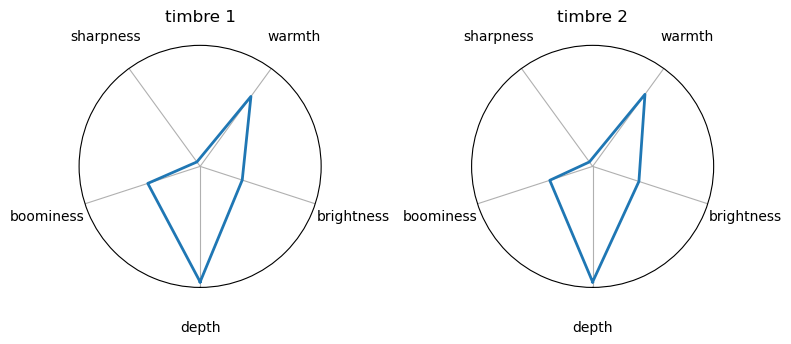

In [157]:
pack.compare_plot('timbre')
plt.show()

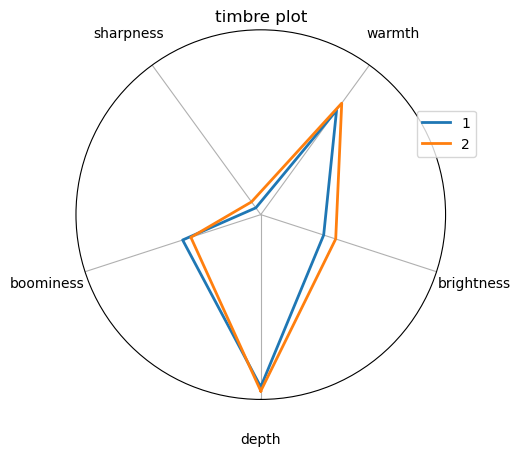

In [156]:
pack.plot('timbre')
plt.show()

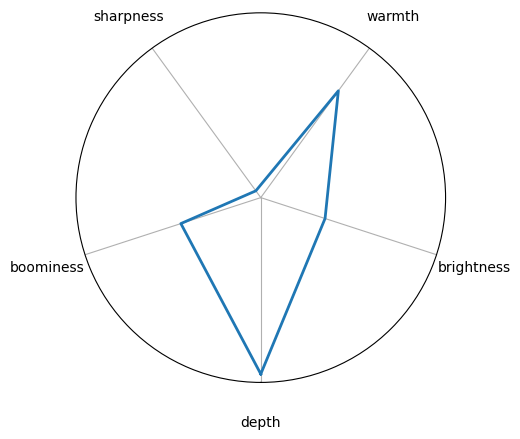

In [158]:
test1.signal.plot('timbre')
plt.show()